In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)


df['job_skills'] = df['job_skills'].apply(clean_li)

In [66]:
df = df[df['job_title_short']=='Data Scientist']

df_exploded = df.explode(['job_skills'])


skill_stat = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skill_stat

,skill_count,median_salary
job_skills,,
airflow,3915,157000.0
airtable,65,215500.0
alteryx,2068,115000.0
angular,736,93500.0
angular.js,12,NaN
...,...,...
wrike,8,NaN
wsl,31,NaN
xamarin,5,NaN


In [27]:
# Pivot filter
# df_exploded.pivot_table(index='job_skills', values=(['salary_year_avg']) ,aggfunc={'salary_year_avg': 'median', 'job_skills': 'count'})
                        

,job_skills,salary_year_avg
job_skills,,
airflow,45254,147090.5
airtable,296,102500.0
alteryx,12297,115000.0
angular,5354,130000.0
angular.js,115,127050.0
...,...,...
wrike,73,101250.0
wsl,96,NaN
xamarin,62,121250.0


In [67]:
skill_stat  = skill_stat.sort_values(by='skill_count',ascending=False).head(10)

skill_stat

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


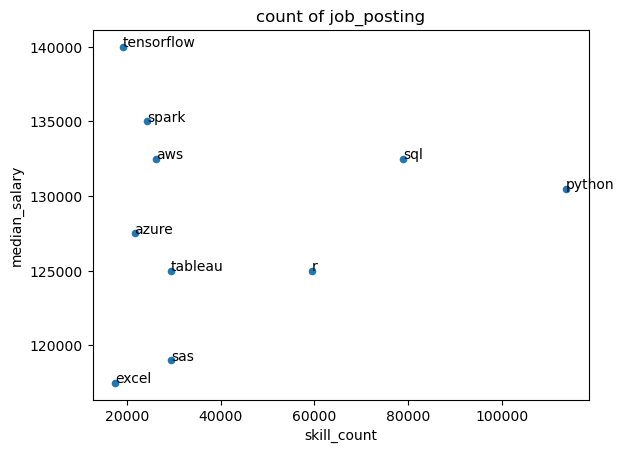

In [68]:
skill_stat.plot(kind='scatter',x='skill_count',y='median_salary')

plt.title('count of job_posting')
# # plt.xlabel('job_posting_count')
# # plt.ylabel('')
# # plt.legend().set_visible(False)

for i, txt in enumerate(skill_stat.index):
     plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],txt)    
plt.show()

